In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import sklearn as sk
import seaborn as sns
import math
import sklearn.metrics

from math import exp
from scipy import stats
from plotly.subplots import make_subplots
from pandas import value_counts
from sklearn.metrics import mean_squared_error


In [ ]:
DataM2 = pd.read_csv('/content/drive/MyDrive/DATASETS/M2_Data.csv')
DataM4 = pd.read_csv('/content/drive/MyDrive/DATASETS/M4_Data.csv')

In [ ]:
# Drop first row as it contains the units of each variable as strings
DataM2 = DataM2.iloc[1: , :]

# Convert UTC to DateTime
DataM2['time'] = pd.to_datetime(DataM2['time'])

# Convert Values to m/s and floats for later
DataM2['WindSpeed'] = DataM2['WindSpeed'].astype(float)
DataM2['WindSpeed'] = DataM2['WindSpeed']/1.944
DataM2['Gust'] = DataM2['Gust'].astype(float)
DataM2['Gust'] = DataM2['Gust']/1.944
DataM2['WindDirection'] = DataM2['WindDirection'].astype(float)

DataM2.head()

station_id  CallSign longitude latitude                      time  \
1         M2   62091.0   -5.4302  53.4836 2023-01-01 12:00:00+00:00   
2         M2   62091.0   -5.4302  53.4836 2023-01-01 13:00:00+00:00   
3         M2   62091.0   -5.4302  53.4836 2023-01-01 14:00:00+00:00   
4         M2   62091.0   -5.4302  53.4836 2023-01-01 15:00:00+00:00   
5         M2   62091.0   -5.4302  53.4836 2023-01-01 16:00:00+00:00   

  AtmosphericPressure  WindDirection  WindSpeed       Gust WaveHeight  ...  \
1             1000.94          246.0   9.780350  12.532407      1.758  ...   
2            1001.379          253.0   6.676440   9.545782      1.758  ...   
3            1001.855          246.0   7.847737   9.955761      1.992  ...   
4            1002.222          264.0   7.554527   8.960391      1.992  ...   
5            1002.515          275.0   6.266461   8.199074      2.109  ...   

    Hmax AirTemperature DewPoint SeaTemperature salinity RelativeHumidity  \
1  2.813          8.652      NaN         11.307      NaN           79.004   
2  2.656          8.408      NaN         11.307      NaN           78.125   
3  2.656          8.604      NaN         11.301      NaN           75.977   
4  3.438          8.457      NaN         11.301      NaN           78.223   
5  3.125          7.822      NaN         11.329      NaN           83.496   

     SprTp     ThTp      Tp QC_Flag  
1  113.906  170.156  11.719     0.0  
2  109.688  174.375  12.539     0.0  
3     67.5  175.781  10.547     0.0  
4   85.781  171.563  10.547     0.0  
5  106.875  172.969  11.133     0.0  

[5 rows x 22 columns]

In [ ]:
# Repeat for M4 Data
DataM4 = DataM4.iloc[1: , :]

# Convert UTC to DateTime
DataM4['time'] = pd.to_datetime(DataM4['time'])

# Convert Values to m/s and floats for later
DataM4['WindSpeed'] = (DataM4['WindSpeed'].astype(float))
DataM4['WindSpeed'] = DataM4['WindSpeed']/1.944
DataM4['Gust'] = DataM4['Gust'].astype(float)
DataM4['Gust'] = DataM4['Gust']/1.944
DataM4['WindDirection'] = DataM4['WindDirection'].astype(float)

DataM4.head()

station_id  CallSign  longitude   latitude                      time  \
1         M4   62093.0  -9.999136  54.999967 2023-01-01 12:00:00+00:00   
2         M4   62093.0  -9.999136  54.999967 2023-01-01 13:00:00+00:00   
3         M4   62093.0  -9.999136  54.999967 2023-01-01 14:00:00+00:00   
4         M4   62093.0  -9.999136  54.999967 2023-01-01 15:00:00+00:00   
5         M4   62093.0  -9.999136  54.999967 2023-01-01 16:00:00+00:00   

  AtmosphericPressure  WindDirection  WindSpeed       Gust WaveHeight  ...  \
1             1000.72           53.0   5.621914  10.658436      3.047  ...   
2            1001.465           64.0   4.040638   6.207819       2.93  ...   
3            1002.075           37.0   2.576646   4.450617      2.578  ...   
4            1002.588           48.0   4.392490   6.559156      2.813  ...   
5            1003.491           48.0   5.739198   8.491770      2.461  ...   

    Hmax AirTemperature DewPoint SeaTemperature salinity RelativeHumidity  \
1  4.531          5.576      NaN         10.891      NaN           74.316   
2  5.313          5.674      NaN         10.908      NaN           82.617   
3  4.375          4.941      NaN         10.902      NaN           84.277   
4    5.0          5.625      NaN         10.831      NaN           85.156   
5  4.531          5.918      NaN         10.856      NaN            79.98   

     SprTp     ThTp      Tp QC_Flag  
1  142.031  354.375  13.359     0.0  
2  106.875  354.375  13.359     0.0  
3  118.125  347.344  14.297     0.0  
4  234.844  307.969  11.719     0.0  
5  137.813    9.844  13.359     0.0  

[5 rows x 22 columns]

In [ ]:
# Plot Windspeed against Time

fig = go.Figure()

fig.add_trace(go.Scatter(x=DataM2['time'], y=DataM2['WindSpeed'], name=f"M2", marker_color='rgb(55, 83, 109)', text=DataM2['station_id'], textposition='top right'))
fig.add_trace(go.Scatter(x=DataM4['time'], y=DataM4['WindSpeed'], name=f"M4", marker_color='rgb(26, 180, 255)', text=DataM4['station_id'], textposition='top right'))
fig.update_layout(title_text = "Wind Speed VS Time Over One Year Period", title_x = 0.5)
fig.update_layout(yaxis_title = 'Wind Speed (m/s)')
fig.update_layout(xaxis_title = 'Time')
fig.show()


In [ ]:
#Calculate Weekly Average Speeds
DataM2['WeeklyAverageSpeed'] = DataM2.groupby(DataM2['time'].dt.isocalendar().week)['WindSpeed'].transform('mean')

DataM4['WeeklyAverageSpeed'] = DataM4.groupby(DataM2['time'].dt.isocalendar().week)['WindSpeed'].transform('mean')

In [ ]:
# Plot Weekly Average Speeds
fig = go.Figure()

fig.add_trace(go.Scatter(x=DataM2['time'], y=DataM2['WeeklyAverageSpeed'], name=f"M2", marker_color='rgb(55, 83, 109)', text=DataM2['station_id'], textposition='top right'))
fig.add_trace(go.Scatter(x=DataM4['time'], y=DataM4['WeeklyAverageSpeed'], name=f"M4", marker_color='rgb(26, 180, 255)', text=DataM4['station_id'], textposition='top right'))
fig.update_layout(title_text = "Weekly Average Wind Speed VS Time (ISO Calendar Format)", title_x = 0.475)
fig.update_layout(yaxis_title = 'Wind Speed (m/s)')
fig.update_layout(xaxis_title = 'Time')

fig.show()

In [ ]:
# Calculate Year Mean Wind Speeds and Standard Deviation

M2_Yearly_Speed = DataM2['WindSpeed'].mean()
M2_Yearly_StdDev = DataM2['WindSpeed'].std()

M2_Yearly_Speed = M2_Yearly_Speed.astype(float)
M2_Yearly_StdDev = M2_Yearly_StdDev.astype(float)

print("M2")
print(f"Average Wind Speed: {M2_Yearly_Speed:.2f} m/s")
print(f"Std Dev: \u00B1{M2_Yearly_StdDev:.2f} m/s")

M4_Yearly_Speed = DataM4['WindSpeed'].mean()
M4_Yearly_StdDev = DataM4['WindSpeed'].std()

print("M4")
print(f"Average Wind Speed: {M4_Yearly_Speed:.2f} m/s")
print(f"Std Dev: \u00B1{M4_Yearly_StdDev:.2f} m/s")


M2
Average Wind Speed: 7.64 m/s
Std Dev: ±3.37 m/s
M4
Average Wind Speed: 8.30 m/s
Std Dev: ±3.57 m/s


In [ ]:
# Gaussian PDF not needed but I calculated this anyway
x = DataM2['WindSpeed']

DataM2['Gaussian'] = (1/(M2_Yearly_StdDev*np.sqrt(2*np.pi)))*(np.exp(-(np.square(x-M2_Yearly_Speed))/(2*np.square(M2_Yearly_StdDev))))

print(DataM2)

In [ ]:
print(DataM4)

In [ ]:
# Bin Data

bins = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
bin_mids = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,15.5,16.5,17.5,18.5,19.5,20.5,21.5]

bins_labels = ['0-1 m/s','1-2m/s','2-3m/s','3-4m/s','4-5m/s','5-6m/s',
               '6-7m/s','7-8m/s','8-9m/s','9-10m/s','10-11m/s','11-12m/s',
               '12-13m/s','13-14m/s','14-15m/s','15-16m/s','16-17m/s','17-18m/s',
               '18-19m/s','19-20m/s','20-21m/s','21-22m/s'
               ]
bins_dir = [0, 11.25, 33.75, 56.25, 78.75,101.25,123.75,146.25,168.75,191.25,213.75,236.25,258.75,281.25,303.75,326.25,348.75, 360.00]
bins_dir_labels = ['N','NNE','NE','ENE','E','ESE','SE','SSE','S','SSW','SW','WSW','W','WNW','NW','NNW','North']

# bin the age column
DataM2['SpeedBin'] = pd.cut(DataM2['WindSpeed'], bins, labels=bins_labels)
DataM2['DirBin'] = pd.cut(DataM2['WindDirection'], bins_dir, labels = bins_dir_labels)

DataM4['SpeedBin'] = pd.cut(DataM4['WindSpeed'], bins, labels=bins_labels)
DataM4['DirBin'] = pd.cut(DataM4['WindDirection'], bins_dir, labels = bins_dir_labels)


In [ ]:
DataM2Binned = DataM2.groupby(by = ['SpeedBin']).size().reset_index(name="Count")
DataM4Binned = DataM4.groupby(by = ['SpeedBin']).size().reset_index(name="Count")


In [ ]:
DataM2Binned['ProbDensity'] = DataM2Binned['Count']/((DataM2Binned['Count'].sum()))
DataM4Binned['ProbDensity'] = DataM4Binned['Count']/((DataM4Binned['Count'].sum()))

In [ ]:

# # For plotting gaussian PDF, couldn't get this to work with the plot of binned
# DataM2Gaussian = DataM2.groupby(by = ['Gaussian','SpeedBin']).size().reset_index(name="Count")
# DataM2Gaussian = DataM2Gaussian.drop_duplicates(subset = ['SpeedBin','Count'], keep = False)

# #DataM2Gaussian.sort_values(by=['SpeedBin','Gaussian'], inplace=True)

# DataM2Gaussian = DataM2Gaussian.groupby('SpeedBin')['Gaussian'].transform(max).reset_index(name="Gaussian")
# #DataM4Gaussian.sort_values(by=['SpeedBin'], inplace=True)

In [ ]:
# print(DataM2Binned)
# print(DataM4Binned)
# print(DataM2Gaussian)

In [ ]:
# Bin Data Based on Wind Speed and Wind Direction for M2

DataM2Directional = []

DataM2Directional = pd.DataFrame(DataM2Directional)

DataM2Directional['DirBin'] = DataM2['DirBin']
DataM2Directional['Magnitude'] =  DataM2['SpeedBin']

# Get frequencies for each bin
DataM2Directional = DataM2Directional.groupby(by = ['Magnitude','DirBin']).size().reset_index(name="Count")
DataM2Directional['Percentage'] = (DataM2Directional['Count']/(DataM2Directional['Count'].sum()))*100

#Get rid of North label. This label was necessary earlier as the number of bin labels must be 1 < number of bins when setting labels, it is no longer needed

DataM2Directional = DataM2Directional.replace(r'North', 'N', regex=True)

In [ ]:
# Repeat for M4
DataM4Directional = []

DataM4Directional = pd.DataFrame(DataM4Directional)

DataM4Directional['DirBin'] = DataM4['DirBin']
DataM4Directional['Magnitude'] =  DataM4['SpeedBin']

# Get frequencies for each bin
DataM4Directional = DataM4Directional.groupby(by = ['Magnitude','DirBin']).size().reset_index(name="Count")

DataM4Directional['Percentage'] = (DataM4Directional['Count']/(DataM4Directional['Count'].sum()))*100

DataM4Directional = DataM4Directional.replace(r'North', 'N', regex=True)

In [ ]:
# Windrose For each site

fig1 = px.bar_polar(DataM2Directional, r="Percentage", theta="DirBin",
                   template="seaborn", color = 'Magnitude',
                   color_discrete_sequence= px.colors.sequential.Plasma_r)

fig1.update_layout(title = 'M2', title_x = 0.35, polar_radialaxis_ticksuffix='%')
fig1.show()

fig2 = px.bar_polar(DataM4Directional, r="Percentage", theta="DirBin",
                   template="seaborn", color = 'Magnitude',
                   color_discrete_sequence= px.colors.sequential.Plasma_r)
fig2.update_layout(title = 'M4', title_x = 0.35, polar_radialaxis_ticksuffix='%')

fig2.show()


In [ ]:
# Plot Binned Values for Method of Bins

fig = go.Figure()

fig.add_trace(go.Histogram(x=DataM2['SpeedBin'],
                          histnorm='probability density',
                          name='M2',
))
fig.add_trace(go.Histogram(x=DataM4['SpeedBin'],
                         histnorm='probability density',
                         name='M4',
))
fig.add_trace(go.Scatter(x=DataM2Binned['SpeedBin'],y=DataM2Binned['ProbDensity'], mode='lines', name = 'M2 PDF', marker_color='rgb(55, 83, 109)'))
#fig.add_trace(go.Scatter(x=DataM2Gaussian['SpeedBin'],y=DataM2Gaussian['Gaussian'],mode = 'lines', name = 'M2 Gaussian PDF', marker_color='rgb(55, 83, 109)'))
fig.add_trace(go.Scatter(x=DataM4Binned['SpeedBin'],y=DataM4Binned['ProbDensity'], mode='lines', name = 'M4 PDF', marker_color='rgb(26, 180, 255)'))

fig.layout.bargap = 0
fig.update_layout(barmode='overlay')
fig.update_layout(yaxis_title = 'Probability',yaxis_tickformat=".2")
fig.update_layout(xaxis_title = 'Wind Speed')
fig.update_layout(title = 'Histogram of Binned Wind Speed Data (M4) with PDF')
fig.update_xaxes(categoryorder='array', categoryarray= bins_labels)
fig.update_traces(opacity=0.75)

fig.show()

<Axes: xlabel='WindSpeed', ylabel='Count'>

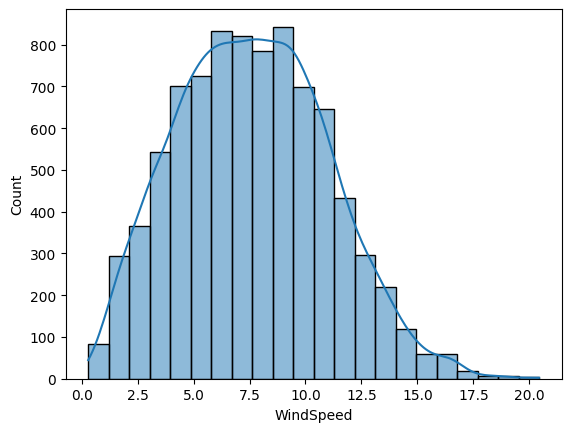

In [ ]:
# Seaborn histplot for comparison

sns.histplot(data = DataM2, x = DataM2.WindSpeed, kde = True, bins = 22)

In [ ]:
# Sort data for plotting

DataM2.sort_values(by=['WindSpeed'], inplace=True)
DataM4.sort_values(by=['WindSpeed'], inplace=True)

In [ ]:
# Calculate Weibull PDF

M2params = stats.weibull_min.fit(DataM2['WindSpeed'],floc = 0)
M4params = stats.weibull_min.fit(DataM4['WindSpeed'],floc = 0)

speed_range = np.arange(0, 40)

print(M2params)
print(M4params)

DataM2['M2WeibullPDF'] = stats.weibull_min.pdf(DataM2['WindSpeed'], *M2params) # params = shape, scale, location
DataM4['M4WeibullPDF'] = stats.weibull_min.pdf(DataM4['WindSpeed'], *M4params)

(2.421799603497628, 0, 8.607911602066505)
(2.4856365227875403, 0, 9.346309297691565)


In [ ]:
# Calculate Rayleigh PDF for M2
M2Params = stats.rayleigh.fit(DataM2['WindSpeed'])

print(M2Params)

DataM2['M2RayleighPDF'] = stats.rayleigh.pdf(DataM2['WindSpeed'], *M2Params) #params = location, shape

(0.2830622304230513, 5.719015560214275)


In [ ]:
# Calculate Rayleigh PDF for M4
M4Params = stats.rayleigh.fit(DataM4['WindSpeed'])

print(M4Params)

DataM4['M4RayleighPDF'] = stats.rayleigh.pdf(DataM4['WindSpeed'], *M4Params) #params = location, shape

(0.3395375479198255, 6.168883251643945)


In [ ]:
# Add All PDFs to Figure 3

hist_data = [DataM2['WindSpeed'], DataM4['WindSpeed']]

#hist_data = [DataM2['WindSpeed']]
group_labels = ['M2','M4']

colors = ['rgb(0, 0, 100)', 'rgb(255, 200, 200)']

fig3 = ff.create_distplot(hist_data, group_labels, bin_size=[1.0, 1.0], show_hist = True, show_rug=False, histnorm='probability density', colors = colors)
fig3.update_layout(yaxis_title = 'Probability')
fig3.update_layout(xaxis_title = 'Wind Speed')

fig3.add_trace(go.Line( x = DataM2['WindSpeed'], y = DataM2['M2WeibullPDF'], name = 'M2 Weibull   (k = 2.42, c = 8.60)', line_width = 3))
fig3.add_trace(go.Line( x = DataM4['WindSpeed'], y = DataM4['M4WeibullPDF'], name = 'M4 Weibull   (k = 2.48, c = 9.35)', line_width = 3))

fig3.add_trace(go.Line( x = DataM2['WindSpeed'], y = DataM2['M2RayleighPDF'], name = 'M2 Rayleigh (k = 2.00, c = 5.72)', line_width = 3))
fig3.add_trace(go.Line( x = DataM4['WindSpeed'], y = DataM4['M4RayleighPDF'], name = 'M4 Rayleigh (k = 2.00, c = 6.17)', line_width = 3))

fig3.update_layout(title = 'Plot of Weibull, Rayleigh Distributions and PDF for both Sites')
fig3.show()



/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
# Goodness of Fit Weibull

DataM2['M2WeibullCDF'] = stats.weibull_min.cdf(DataM2['WindSpeed'], *M2params)

stats.kstest(DataM2['WindSpeed'], DataM2['M2WeibullCDF'])

KstestResult(statistic=0.9928746641747459, pvalue=0.0, statistic_location=0.9997022959896407, statistic_sign=-1)

In [ ]:
# Goodness of Fit Weibull

DataM4['M4WeibullCDF'] = stats.weibull_min.cdf(DataM4['WindSpeed'], *M4params)

stats.kstest(DataM4['WindSpeed'], DataM4['M4WeibullCDF'])

KstestResult(statistic=0.9943813648601194, pvalue=0.0, statistic_location=0.999874478982366, statistic_sign=-1)

In [ ]:
#Rayleigh
DataM2['M2RayleighCDF'] = stats.rayleigh.cdf(DataM2['WindSpeed'], *M2Params)

stats.kstest(DataM2['WindSpeed'], DataM2['M2RayleighCDF'])

KstestResult(statistic=0.9933418993108282, pvalue=0.0, statistic_location=0.9950461395336686, statistic_sign=-1)

In [ ]:
#Rayleigh
DataM4['M4RayleighCDF'] = stats.rayleigh.cdf(DataM4['WindSpeed'], *M4Params)

stats.kstest(DataM4['WindSpeed'], DataM4['M4RayleighCDF'])

KstestResult(statistic=0.9943813648601194, pvalue=0.0, statistic_location=0.998517245403491, statistic_sign=-1)

In [ ]:
#CDF of binned data

DataM2Binned['CDF'] = (DataM2Binned['ProbDensity']).cumsum()

print(DataM2Binned)

DataM4Binned['CDF'] = (DataM4Binned['ProbDensity']).cumsum()

print(DataM2Binned)

    SpeedBin  Count  ProbDensity       CDF
0    0-1 m/s     61     0.007125  0.007125
1     1-2m/s    264     0.030838  0.037963
2     2-3m/s    417     0.048709  0.086672
3     3-4m/s    580     0.067749  0.154421
4     4-5m/s    744     0.086906  0.241327
5     5-6m/s    854     0.099755  0.341082
6     6-7m/s    878     0.102558  0.443640
7     7-8m/s    871     0.101740  0.545380
8     8-9m/s    888     0.103726  0.649106
9    9-10m/s    870     0.101624  0.750730
10  10-11m/s    722     0.084336  0.835066
11  11-12m/s    534     0.062376  0.897442
12  12-13m/s    345     0.040299  0.937741
13  13-14m/s    260     0.030370  0.968111
14  14-15m/s    125     0.014601  0.982712
15  15-16m/s     65     0.007593  0.990305
16  16-17m/s     59     0.006892  0.997197
17  17-18m/s     10     0.001168  0.998365
18  18-19m/s     10     0.001168  0.999533
19  19-20m/s      1     0.000117  0.999650
20  20-21m/s      3     0.000350  1.000000
21  21-22m/s      0     0.000000  1.000000
    SpeedBi

In [ ]:
#

fig4 = go.Figure()

fig4.add_trace(go.Line( x = DataM2Binned['SpeedBin'], y = DataM2Binned['CDF'], name = 'M2 CDF   (k = 2.42, c = 8.60)', line_width = 3))
fig4.add_trace(go.Line( x = DataM4Binned['SpeedBin'], y = DataM4Binned['CDF'], name = 'M4 CDF   (k = 2.42, c = 8.60)', line_width = 3))

fig4.add_trace(go.Line( x = DataM2['SpeedBin'], y = DataM2['M2WeibullCDF'], name = 'M2 Weibull   (k = 2.42, c = 8.60)', line_width = 3))
fig4.add_trace(go.Line( x = DataM4['SpeedBin'], y = DataM4['M4WeibullCDF'], name = 'M4 Weibull   (k = 2.48, c = 9.35)', line_width = 3))

fig4.add_trace(go.Line( x = DataM2['SpeedBin'], y = DataM2['M2RayleighCDF'], name = 'M2 Rayleigh (k = 2.00, c = 5.72)', line_width = 3))
fig4.add_trace(go.Line( x = DataM4['SpeedBin'], y = DataM4['M4RayleighCDF'], name = 'M4 Rayleigh (k = 2.00, c = 6.17)', line_width = 3))

fig4.update_layout(title = 'Plot of Weibull, Rayleigh CDFs and CDF from Method of Bins for M4')
fig4.show()


In [ ]:
# Max Values for M2 and M4

maxValues1 = DataM2['Gust'].max()
maxValues2 = DataM4['Gust'].max()

print(maxValues1)
print(maxValues2)

26.587962962962962
31.03858024691358
